In [2]:
import pandas as pd

In [9]:
df = pd.read_csv('kyphosis.csv')
df[df.Start> 8.5].count()

Kyphosis    62
Age         62
Number      62
Start       62
dtype: int64

In [7]:
df.shape

(81, 4)

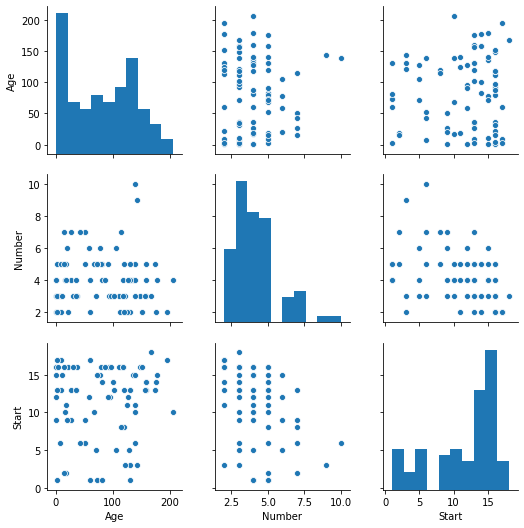

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df[["Age", "Number", "Start"]])

In [10]:
from sklearn.model_selection import train_test_split
x = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [11]:
# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
predictions = dtree.predict(x_test)
predictions

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'present',
       'present', 'absent', 'absent', 'absent', 'absent', 'present',
       'present', 'present', 'absent', 'absent', 'absent', 'absent',
       'present'], dtype=object)

In [15]:
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix
print(classification_report(y_test,predictions))
confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

      absent       0.75      0.63      0.69        19
     present       0.22      0.33      0.27         6

    accuracy                           0.56        25
   macro avg       0.49      0.48      0.48        25
weighted avg       0.62      0.56      0.59        25



array([[12,  7],
       [ 4,  2]])

In [ ]:
!conda install pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::pytables==3.4.4=py37h13cba08_0
  - defaults/osx-64::mkl-service==1.1.2=py37h6b9c3cc_5
  - defaults/osx-64::blaze==0.11.3=py37_0
done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |           py36_1          42 KB
    ------------------------------------------------------------
                                           Total:          42 KB

The following NEW packages will be INSTALLED:

  pydotplus          pkgs/main/osx-64::pydotplus-2.0.2-py36_1


Proceed ([y]/n)? 

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
rfc_pred = rfc.predict(x_test)
rfc.score(x_test,y_test)

0.76

In [20]:
rfc.predict_proba(x_test)

array([[0.22, 0.78],
       [0.98, 0.02],
       [0.81, 0.19],
       [0.66, 0.34],
       [0.99, 0.01],
       [0.8 , 0.2 ],
       [0.75, 0.25],
       [0.73, 0.27],
       [0.82, 0.18],
       [0.78, 0.22],
       [1.  , 0.  ],
       [0.42, 0.58],
       [0.65, 0.35],
       [0.94, 0.06],
       [0.77, 0.23],
       [0.97, 0.03],
       [0.98, 0.02],
       [0.57, 0.43],
       [0.77, 0.23],
       [0.61, 0.39],
       [0.99, 0.01],
       [0.72, 0.28],
       [0.91, 0.09],
       [0.87, 0.13],
       [0.78, 0.22]])

<BarContainer object of 3 artists>

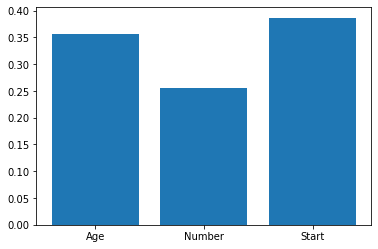

In [21]:
plt.bar(x.columns,rfc.feature_importances_)